# Titanic 

### Resourses 
* https://python.plainenglish.io/kaggle-titanic-challenge-create-them-features-a324ba577812

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [2]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")
df = pd.concat([train, test], sort=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


## Identify NAs

In [4]:
df.isna().sum(axis=0)

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Count'>

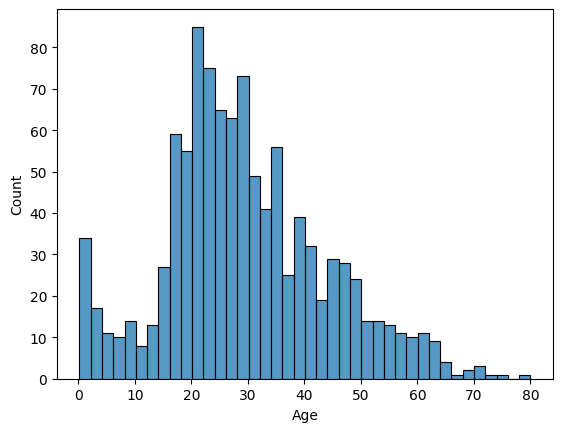

In [5]:
sns.histplot(df["Age"], bins=40)

In [6]:
pd.options.display.max_rows = 999
df[df["Cabin"].notna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
21,22,1.0,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
23,24,1.0,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1.0,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,0,PC 17572,76.7292,D33,C


# Create new features

## Family name

In [7]:
df['family_name'] = df["Name"].apply(lambda x: x.split(',')[0])

In [8]:
df['family_name']

0             Braund
1            Cumings
2          Heikkinen
3           Futrelle
4              Allen
           ...      
413          Spector
414    Oliva y Ocana
415          Saether
416             Ware
417            Peter
Name: family_name, Length: 1309, dtype: object

## Title

In [9]:
import re

In [10]:
df["title"] = df["Name"].str.extract(".*, (.*?)\. .*")

In [11]:
df.iloc[513]

PassengerId                                               514
Survived                                                  1.0
Pclass                                                      1
Name           Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Sex                                                    female
Age                                                      54.0
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17603
Fare                                                     59.4
Cabin                                                     NaN
Embarked                                                    C
family_name                                        Rothschild
title                                                     Mrs
Name: 513, dtype: object

In [12]:
new_title = {
    'Mr' : 'Mr',
    'Ms' : 'Ms',
    'Mrs' : 'Mrs',
    'Rev' : 'officer',
    'Sir' : 'royalty',
    'the Countess' : 'royalty',
    'Dona' : 'royalty',
    'Capt' : 'officer',
    'Col' : 'officer',
    'Don' : 'royalty',
    'Dr' : 'officer',
    'Jonkheer' : 'royalty',
    'Lady' : 'royalty',
    'Major' : 'officer',
    'Master' : 'kid',
    'Miss' : 'Ms',
    'Mlle' : 'Ms',
    'Mme' : 'Mrs'
}
df["title"].replace(new_title, inplace=True)

In [13]:
df.groupby("title").mean()["Survived"]

/tmp/ipykernel_51878/2641158468.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("title").mean()["Survived"]


title
Mr         0.156673
Mrs        0.793651
Ms         0.702703
kid        0.575000
officer    0.277778
royalty    0.600000
Name: Survived, dtype: float64

## Cabin Section

In [14]:
df["Cabin"] = df["Cabin"].apply(lambda x: "X" if pd.isnull(x) or x == "T" else x)
df["Cabin_Section"] = df['Cabin'].str[0]

In [15]:
df["Cabin_Section"].head()

0    X
1    C
2    X
3    C
4    X
Name: Cabin_Section, dtype: object

In [16]:
df.groupby("Cabin_Section").mean()["Survived"]

/tmp/ipykernel_51878/1385213587.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Cabin_Section").mean()["Survived"]


Cabin_Section
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
X    0.299419
Name: Survived, dtype: float64

In [17]:
df["Cabin_Section"].value_counts()

X    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Cabin_Section, dtype: int64

## Family size
* We will be using Boosting and Bagging Tree-based models for classification. Binning family sizes into groups will help our model learn better.

In [18]:
df["family_size"] = df["SibSp"] + df["Parch"] + 1

In [19]:
# Group Passengers by family Size
family_map = {
  1: 'Alone', 
  2: 'Small', 
  3: 'Small', 
  4: 'Small', 
  5: 'Medium', 
  6: 'Medium', 
  7: 'Large',
  8: 'Large',
  11: 'Large'
}
df["family_size_grouped"] = df["family_size"].map(family_map)

In [20]:
df.groupby("family_size").mean()["Survived"]

/tmp/ipykernel_51878/1845505632.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("family_size").mean()["Survived"]


family_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

## Grouping tickets
* Some passengers are sharing the same ticket numbers. Indicative of their group (family, friends) size

In [21]:
df["ticket_group_size"] = df.groupby("Ticket")["Ticket"].transform('count')

In [22]:
df.groupby("ticket_group_size").mean()["Survived"]

/tmp/ipykernel_51878/1191880855.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("ticket_group_size").mean()["Survived"]


ticket_group_size
1     0.270270
2     0.513812
3     0.653465
4     0.727273
5     0.333333
6     0.210526
7     0.208333
8     0.384615
11    0.000000
Name: Survived, dtype: float64

## Age_Bin & Fare_Bin
We have observed during EDA that Survival probability varied across Age and Fare segments. Let’s bin them into separate features.

In [23]:
df["fare_bins"] = pd.qcut(df["Fare"], 10)
df["age_bins"] = pd.qcut(df["Age"], 16, duplicates='drop')

In [24]:
df.groupby("fare_bins").mean()["Survived"]

/tmp/ipykernel_51878/1135945701.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("fare_bins").mean()["Survived"]


fare_bins
(-0.001, 7.568]      0.141304
(7.568, 7.854]       0.298851
(7.854, 8.05]        0.179245
(8.05, 10.5]         0.230769
(10.5, 14.454]       0.428571
(14.454, 21.679]     0.420455
(21.679, 26.955]     0.517241
(26.955, 41.579]     0.381443
(41.579, 78.051]     0.529412
(78.051, 512.329]    0.758621
Name: Survived, dtype: float64

In [25]:
df.groupby("age_bins").mean()["Survived"]

/tmp/ipykernel_51878/1497963113.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("age_bins").mean()["Survived"]


age_bins
(0.169, 7.312]    0.680000
(7.312, 16.0]     0.420000
(16.0, 18.969]    0.384615
(18.969, 21.0]    0.261538
(21.0, 22.0]      0.407407
(22.0, 24.0]      0.434783
(24.0, 26.0]      0.285714
(26.0, 28.0]      0.418605
(28.0, 30.0]      0.382979
(30.0, 32.0]      0.459459
(32.0, 35.0]      0.470588
(35.0, 39.0]      0.407407
(39.0, 42.0]      0.411765
(42.0, 48.0]      0.326531
(48.0, 55.0]      0.475000
(55.0, 80.0]      0.300000
Name: Survived, dtype: float64

In [26]:
train = df[0:train.shape[0]]
test = df[train.shape[0]:]

## Missing Values
* Following https://python.plainenglish.io/kaggle-titanic-competition-missing-values-f3280267b361

In [27]:
train.isnull().sum()

PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                    177
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                    0
Embarked                 2
family_name              0
title                    0
Cabin_Section            0
family_size              0
family_size_grouped      0
ticket_group_size        0
fare_bins                0
age_bins               177
dtype: int64

In [28]:
test.isnull().sum()

PassengerId              0
Survived               418
Pclass                   0
Name                     0
Sex                      0
Age                     86
SibSp                    0
Parch                    0
Ticket                   0
Fare                     1
Cabin                    0
Embarked                 0
family_name              0
title                    0
Cabin_Section            0
family_size              0
family_size_grouped      0
ticket_group_size        0
fare_bins                1
age_bins                86
dtype: int64

Replace missing fare value with median

In [29]:
test.loc[test['Fare'].isnull(), 'Fare'] = train['Fare'].median()

/tmp/ipykernel_51878/1534458401.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


<AxesSubplot: >

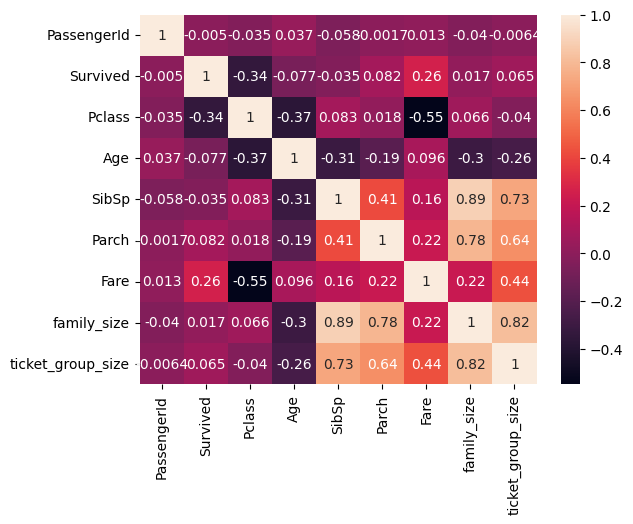

In [30]:
sns.heatmap(train.corr(), annot=True)

Use Pclass, title and sex of train dataset to determine the age of passanger

In [31]:
# Dataframe to group age across Pclass, Title and Sex
age_df = train.groupby(['Pclass','title','Sex']).Age.mean().reset_index()
age_df

,Pclass,title,Sex,Age
0,1,Mr,male,41.580460
1,1,Mrs,female,40.400000
2,1,Ms,female,29.744681
3,1,kid,male,5.306667
4,1,officer,female,49.000000
5,1,officer,male,51.125000
6,1,royalty,female,40.500000
7,1,royalty,male,42.333333
8,2,Mr,male,32.768293
9,2,Mrs,female,33.682927


In [32]:
# Function to Update missing age values
def update_age(params):
    pclass = params[0]
    title = params[1]
    sex = params[2]
    age = params[3]
    if pd.isnull(age):
        age = np.float(age_df[(age_df['title'] == title) & (age_df["Sex"] == sex) & (age_df['Pclass'] == pclass)]["Age"])
    return age

In [33]:
train['Age'] = train[['Pclass', 'title', 'Sex', 'Age']].apply(lambda x: update_age(x), axis = 1)
test['Age'] = test[['Pclass', 'title', 'Sex', 'Age']].apply(lambda x: update_age(x), axis = 1)

/tmp/ipykernel_51878/2564915888.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  age = np.float(age_df[(age_df['title'] == title) & (age_df["Sex"] == sex) & (age_df['Pclass'] == pclass)]["Age"])
/tmp/ipykernel_51878/4053746285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] = train[['Pclass', 'title', 'Sex', 'Age']].apply(lambda x: update_age(x), axis = 1)
/tmp/ipykernel_51878/2564915888.py:8: Deprecati

In [34]:
train.isnull().sum()

PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                      0
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                    0
Embarked                 2
family_name              0
title                    0
Cabin_Section            0
family_size              0
family_size_grouped      0
ticket_group_size        0
fare_bins                0
age_bins               177
dtype: int64

In [35]:
train["age_bins"] = pd.qcut(train["Age"], 16, duplicates='drop')

/tmp/ipykernel_51878/2232278019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["age_bins"] = pd.qcut(train["Age"], 16, duplicates='drop')


In [36]:
test["age_bins"] = pd.qcut(test["Age"], 16, duplicates='drop')

/tmp/ipykernel_51878/667969376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["age_bins"] = pd.qcut(test["Age"], 16, duplicates='drop')


In [37]:
train.loc[train['Embarked'].isnull(), 'Embarked'] = train["Embarked"].mode()[0]

# Training and fine tuning model
* https://python.plainenglish.io/kaggle-titanic-challenge-training-fine-tuning-the-model-42310439ae7


We have a very small dataset of 891 passengers. This eliminates all the Deep learning approaches. What we are left with are simpler models like Logistic regression, Bagging Trees (Random Forest), Boosted Trees (XGBoost, AdaBoost & CatBoost), KNN (K-Nearest Neighbours), and SVMs.

In [38]:
X = train.drop(["PassengerId", "Survived", "Name", "fare_bins", "age_bins"], axis=1)
y = train["Survived"]

In [39]:
dummy_cols = ['Sex', 'Pclass', 'Embarked', 'title', 'Cabin_Section', 
              'family_size_grouped', 'Cabin', 'family_name', 'Ticket']
X = pd.get_dummies(X, prefix=dummy_cols, columns=dummy_cols)

In [40]:
X.head()

,Age,SibSp,Parch,Fare,family_size,ticket_group_size,Sex_female,Sex_male,Pclass_1,Pclass_2,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,22.0,1,0,7.2500,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,1,0,71.2833,2,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,0,0,7.9250,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35.0,1,0,53.1000,2,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,0,0,8.0500,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train test split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Gradient Boosting and Grid Search with CV

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

## Performance

In [44]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85       105
         1.0       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [46]:
feat_import = gb_model.feature_importances_
imp_feats = pd.DataFrame(index=X.columns, data=feat_import, columns=["Importance"])